# Nonlinear Optimization

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("mm.mplstyle")

## The Computer Production Problem

In [2]:
def f(x):
    x1, x2 = x
    return 1440 * x1 - 0.1 * x1**2 + 1740 * x2 - 0.1 * x2 ** 2 - 0.07 * x1 * x2 - 400000

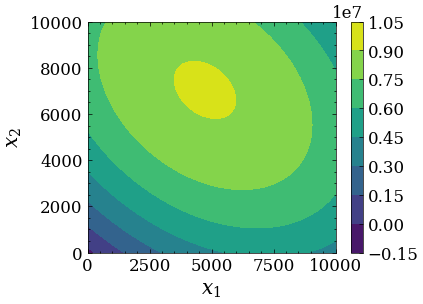

In [3]:
x1_array = np.linspace(0, 10000)
x2_array = np.linspace(0, 10000)
z = f([x1_array.reshape(1, -1), x2_array.reshape(-1, 1)])
plt.contourf(x1_array, x2_array, z)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar()

In [4]:
from scipy.optimize import minimize

In [5]:
def f2(x):
    return -f(x)

In [6]:
x0 = [0, 0]
res = minimize(f2, x0)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -9136410.251171505
        x: [ 4.735e+03  7.043e+03]
      nit: 9
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 6.403e+00 -4.935e+00]
            [-4.935e+00  5.885e+00]]
     nfev: 48
     njev: 16

In [7]:
res.x

array([4734.96330637, 7042.54639091])

In [8]:
-res.fun

np.float64(9136410.251171505)

Problems
- What is the optimization method used?
- Will the initial value affect the optimization outcome?

## With Analytical Jacobian and Hessian

In [9]:
def jac(x):
    x1, x2 = x
    return np.array([1440 - 0.2 * x1 - 0.07 * x2, 1740 - 0.07 * x1 - 0.2 * x2])

def jac2(x):
    return -jac(x)

In [10]:
def hess(x):
    return np.array([[-0.2, -0.07],
           [-0.07, -0.2]])

def hess2(x):
    return -hess(x)

In [11]:
res = minimize(f2, x0, jac=jac2)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -9136410.256410252
        x: [ 4.735e+03  7.043e+03]
      nit: 8
      jac: [-5.684e-14  2.274e-13]
 hess_inv: [[ 5.698e+00 -1.994e+00]
            [-1.994e+00  5.698e+00]]
     nfev: 14
     njev: 14

In [12]:
res = minimize(f2, x0, jac=jac2, hess=hess2, method="Newton-CG")
res

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -9136410.256410254
       x: [ 4.735e+03  7.043e+03]
     nit: 7
     jac: [-1.137e-13 -0.000e+00]
    nfev: 7
    njev: 7
    nhev: 7

Problems
- How does the number of iterations and function evaluations change with the additional information of Jacobian vector and Hessian matrix?
- Why specify the method when using the Hessian?
- Is there a better way to do this? Can we calculate analytical Jacobian and Hessian automatically?

## An Oil Transfer Company

In [23]:
n_types = 2
a_list = [9, 4]
b_list = [3, 5]
h_list = [0.5, 0.2]
t_list = [2, 4]
T = 24

In [26]:
def f(variables):
    x_list = np.abs(variables[:n_types])
    lambda_ = variables[-1]
    lag = 0
    for i in range(n_types):
        x = x_list[i]
        a = a_list[i]
        b = b_list[i]
        h = h_list[i]
        t = t_list[i]
        lag += a * b / x + h * x / 2 + lambda_ * t * x
    lag -= lambda_ * T
    return lag

In [27]:
minimize(f, [1, 1, 0])

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -3188967714.822467
        x: [-3.206e-04  1.927e-04  1.329e+08]
      nit: 66
      jac: [-3.137e+06 -7.149e+06 -3.200e+01]
 hess_inv: [[ 1.892e-13 -5.083e-14  1.377e-13]
            [-5.083e-14  2.143e-13  1.627e-13]
            [ 1.377e-13  1.627e-13  3.770e-10]]
     nfev: 632
     njev: 158

In [28]:
from scipy.optimize import fsolve

In [29]:
def f_deriv(variables):
    x_list = np.abs(variables[:n_types])
    lambda_ = variables[-1]
    deriv = [0, 0, -T]
    for i in range(n_types):
        x = x_list[i]
        a = a_list[i]
        b = b_list[i]
        h = h_list[i]
        t = t_list[i]
        deriv[i] = -a * b / x ** 2 + h / 2 + lambda_ * t
        deriv[-1] += t * x
    return deriv

In [30]:
res = fsolve(f_deriv, [1, 1, 0])
res

array([5.0967774, 3.4516113, 0.3946877])

In [31]:
f(res)

np.float64(12.711215716501204)

Problems
- Why does direct numerical optimization not work for constrained optimization with Lagrange multipliers?
- How to determine if the solution is the minimum?